In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.impute import SimpleImputer
import joblib

In [2]:
train_data = pd.read_csv('/content/train - train.csv')
test_data = pd.read_csv('/content/test - test.csv')

In [3]:
print("Missing values in training data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_data.isnull().sum())

Missing values in training data:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Missing values in test data:
 id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [4]:
train_data_cleaned = train_data.dropna()
test_data_cleaned = test_data.dropna()

In [5]:
print("Missing values in cleaned training data:\n", train_data_cleaned.isnull().sum())
print("Missing values in cleaned test data:\n", test_data_cleaned.isnull().sum())

Missing values in cleaned training data:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Missing values in cleaned test data:
 id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [6]:
# Separate features and target from training data
features = train_data_cleaned.drop(columns=['price_range'])
target = train_data_cleaned['price_range']

In [7]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

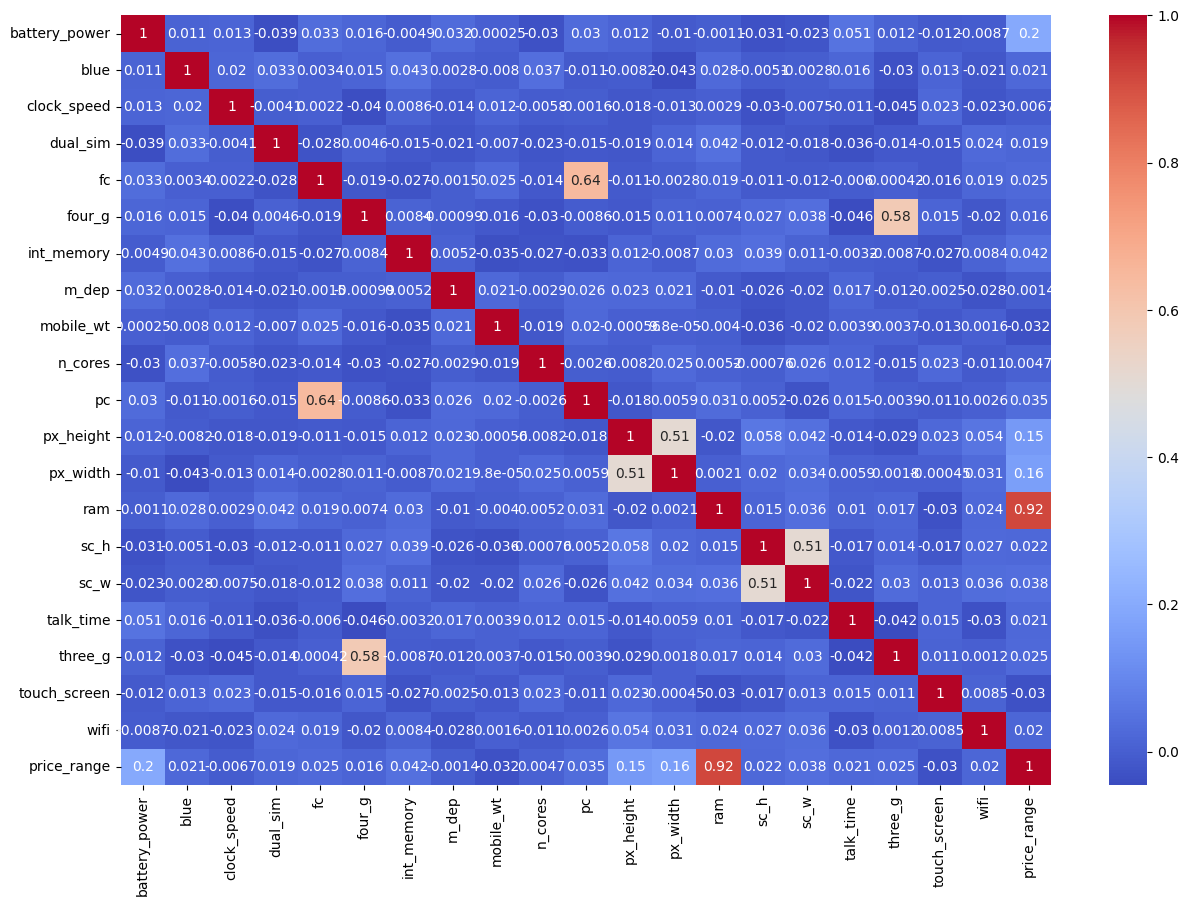

In [9]:
# EDA (Visualize correlations)
corr_matrix = train_data_cleaned.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[98  8  0  0]
 [ 9 76  4  0]
 [ 0 15 86  6]
 [ 0  0  4 93]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.77      0.85      0.81        89
           2       0.91      0.80      0.86       107
           3       0.94      0.96      0.95        97

    accuracy                           0.88       399
   macro avg       0.88      0.89      0.88       399
weighted avg       0.89      0.88      0.88       399



In [12]:
print("Accuracy is " ,accuracy_score(y_test,y_pred))

Accuracy is  0.8847117794486216


In [13]:
joblib.dump(model, 'device_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the model and scaler
model = joblib.load('device_price_model.pkl')
scaler = joblib.load('scaler.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array([data['battery_power'], data['blue'], data['clock_speed'], data['dual_sim'],
                         data['fc'], data['four_g'], data['int_memory'], data['m_dep'],
                         data['mobile_wt'], data['n_cores'], data['pc'], data['px_height'],
                         data['px_width'], data['ram'], data['sc_h'], data['sc_w'],
                         data['talk_time'], data['three_g'], data['touch_screen'], data['wifi']])

    # Reshape the input data
    features = features.reshape(1, -1)

    # Scale features
    features_scaled = scaler.transform(features)

    # Predict the price range
    prediction = model.predict(features_scaled)

    return jsonify({'price_range': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
